In [2]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify
from IPython.display import display, HTML

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [3]:
#pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-dowtown_homeless-9.zip')

pkg

# Downtown San Diego Homeless Sleepers
`sandiegodata.org-dowtown_homeless-9` Last Update: 2019-10-03T18:22:47

_Five years of monthly geographic positions for homeless sleepers in Downtown San Diego_


This dataset provides geographic locations for homeless sleepers in Downtown San Diego, as counted by enumerators from the Downtown San Diego Partnership. These counts have been done monthly since 2012, and this dataset provides counts since 2014. 

<center><a
href="https://data.sandiegodata.org/wp-content/uploads/sites/18/2019/10/Homeless
-Sleepers.png"><img
src="https://data.sandiegodata.org/wp-content/uploads/sites/18/2019/10/Homeless-
Sleepers.png" width="400px"></a></center>


The count is done on paper maps with handwritten count marks. The San Diego
Regional Data Library's [Downton Homelessness
project](http://downtown-homelessness.sandiegodata.org/) converted these
scanned count maps using a [web based image annotation
tool](http://www.robots.ox.ac.uk/~vgg/software/via/).

## Base and Imputed Datasets

This distribution has two version of the homeless counts, the base set,
``homeless_counts``, which has three months of missing data, and the imputed
dataset, ``imputed_counts`` in which these three missing months, 2014-08,
2014-09, and 2015-06 are probabilistically re-created.

The Imputation process uses the total count for the month, from the
``monthly_totals`` dataset, as the number of sleepers that the imputed month
will have. Then, the imputation process collects at least 1,000 records with
dates near the missing month into a sample set, calculating the portion of
records that are in each census block. Then the algorithm randomly selects that
number of records for each census block, and adjusts random blocks so the total
of the whole set of selected records is equal to the official count for the
month.

The result is an imputed month that has the same number of records as the
official count for the month and as the same portion of sleepers in each census
block as in adjacent months.

## Notes

Notes for the source dataset, as of April 2019:

The preliminary methodology (shown in yellow) [ March 2017 and earlier] counted
two individuals per tent and two individuals per vehicle.

On April 27, 2017, the Clean & Safe program adopted the counting methodology
used by the Regional Task Force on the Homeless. Per the methodology
(represented above by the dark green cells), [April 2017 to April 2018,
inclusive ] Clean & Safe staff counted 1.75 individuals per visible
tent/structure and 1.66 individuals per vehicle that showed clear signs of
habitation.

In May 2018, the Regional Task Force on the Homeless updated the methodology
for vehicles to 2.03 that shows clear signs of habitation (the methodology of
1.75 individuals per tent/structure remained the same). The Clean & Safe
program implemented this methodology on May 31, 2018 (represented in orange).

\* Denotes the months that The Downtown Fellowship of Ministries and Churches collaborated with us on the monthly homeless sleep count.

\*\*East Village breakout areas include the following:
    * North East East Village is the area north of Market Street & east of Park Ave. 
    * North West is the area north of Market Street & west of Park Ave.
    * South East is the area east of Park Ave. south of Market Street
    * South West is the area west of Park Ave. south of Market Street

## Caveats

Because this data is extracted, manually, from manually recorded maps, there
are a lot of quality issues. 

### Missing Months

Because of conversion errors and some complications with the source maps, there
are several months of data that are excluded from this dataset

* **August 2014**. In the original datasets, August 2014 was a duplicate of September 2014. 
* **September 2014**. Comfusion related to the duplication of September and August resulted in September being incompletely processed. 
* **June 2015**. All of the map images for this month were blank. An alternate source PDF

In [5]:
df = pkg.resource('imputed_counts').dataframe()
df.date.max()

Timestamp('2018-02-21 00:00:00')

In [7]:
import requests

b = requests.get('https://downtownsandiego.org/wp-content/uploads/2018/04/March-2018-Homeless-Count-Final.pdf').content


In [8]:
from pdf2image import convert_from_path, convert_from_bytes

images = convert_from_bytes(b)

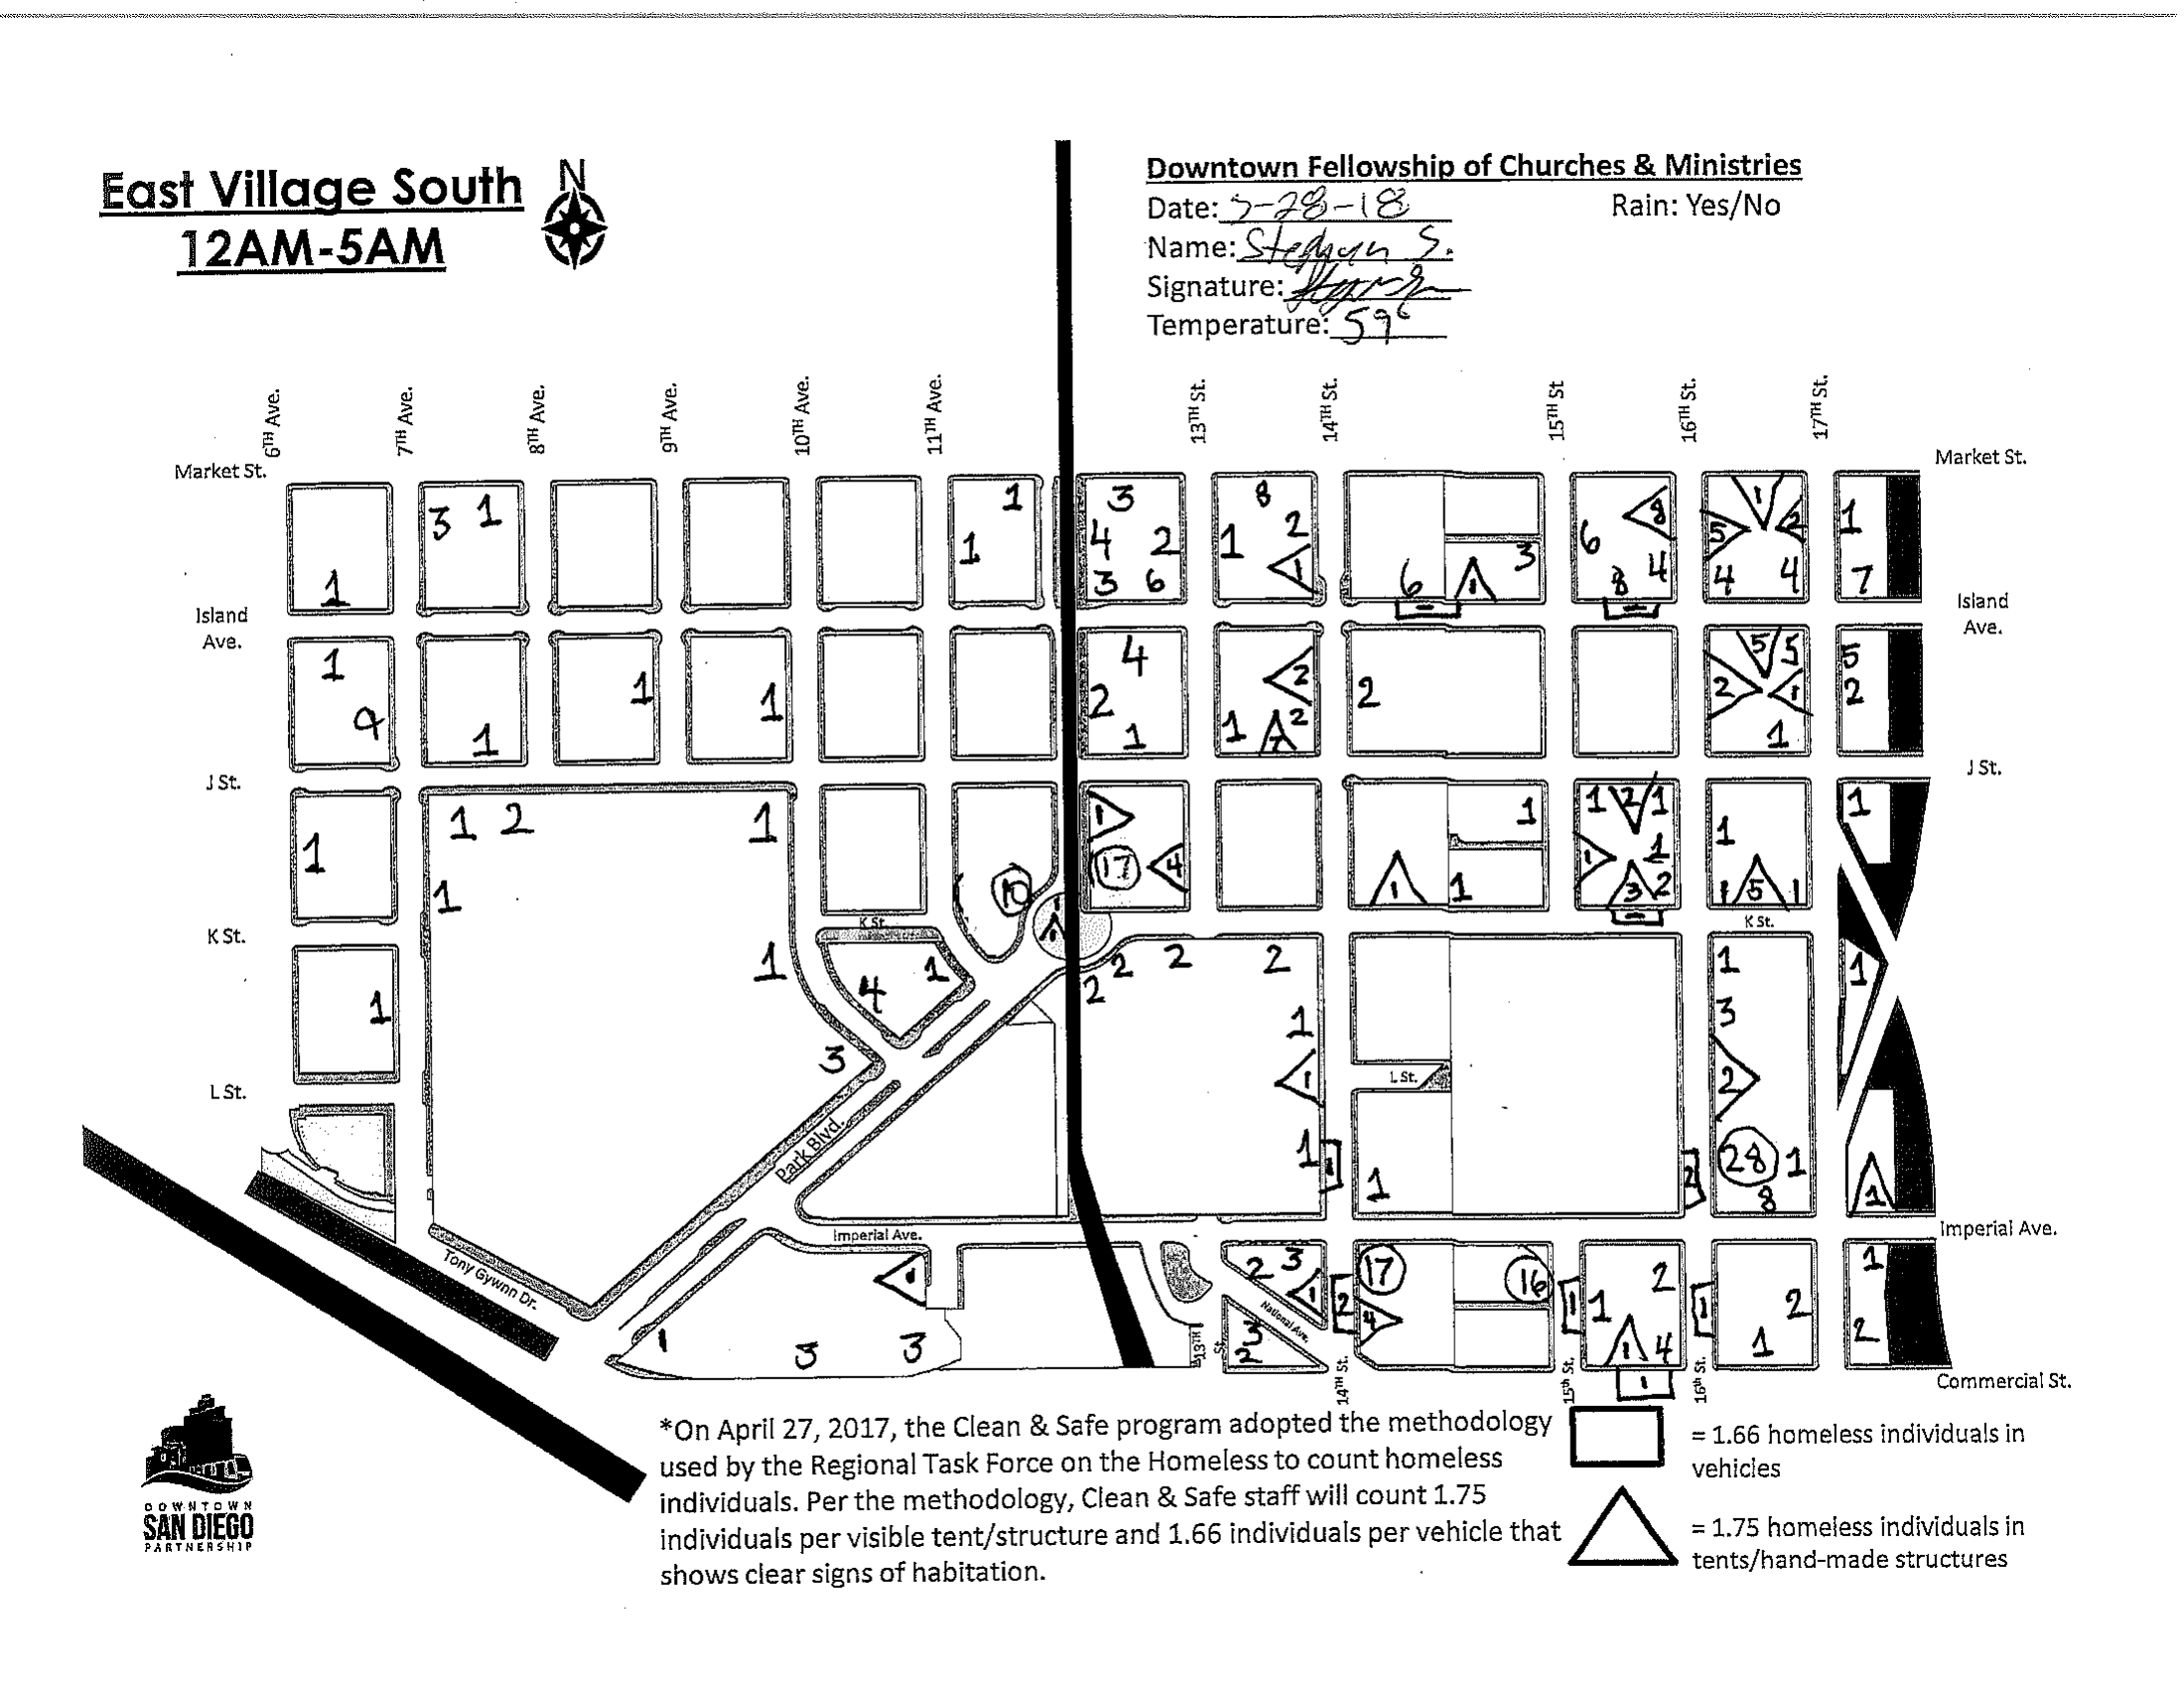

In [18]:
from PIL import Image
images[2].transpose(Image.ROTATE_90)

In [19]:
# CSV Package
pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-downtown_homeless-source-6.csv') 
pkg

# Downtown Homelessness Source Package
`sandiegodata.org-downtown_homeless-source-6` Last Update: 2019-10-01T21:02:30

_Source files for San Diego Downtown homeless sleeper counts_


This dataset provides geographic locations for homeless sleepers in Downtown San Diego, as counted by enumerators from the Downtown San Diego Partnership. These counts have been done monthly since 2012, and this dataset provides counts since 2014. 

This is the source package, use to generate analysis packages. Analysts should probably use one of the analysis packages. See the [Data Library's Homelessness Collection](https://data.sandiegodata.org/collections/homelessness/) for all of the available datasets. 

The count is done on paper maps with handwritten count marks. The San Diego
Regional Data Library's [Downton Homelessness
project](http://downtown-homelessness.sandiegodata.org/) converted these
scanned count maps using a [web based image annotation
tool, VIA](http://www.robots.ox.ac.uk/~vgg/software/via/). These data are extracted from the JSON output from VIA. 

This package has two top level files, and four predecessor files. The top level files are: 

* ``counts``. One record for each handwritten count marking on a map. 
* ``files``. One record for each of the scanned, handmarked maps. 

The predecessor files are: 

* ``raw_file_annotations``. File annotations extracted from the VIA output.
* ``raw_count_annotations``. Count annotations extracted from the VIA output.
* ``raw_gcp``. Ground control point annotations ( street intersections ) extracted from VIA.
* ``gcp_transforms``. Ground control points, in both image and geographic coordinates, with an affine transformation matrix to convert between them. 
* ``intersections``. Geographic positions and names of the street intersections used as ground control points. 

## Caveats

Because this data is extracted, manually, from manually recorded maps, there
are a lot of quality issues. 

### Missing Months

Because of conversion errors and some complications with the source maps, there
are several months of data that are excluded from this dataset

* **August 2014**. In the original datasets, August 2014 was a duplicate of September 2014. 
* **September 2014**. Comfusion related to the duplication of September and August resulted in September being incompletely processed. 
* **June 2015**. All of the map images for this month were blank. An alternate source PDF exists that is not blank, but this file was not used.     


### Not Using Ocupancy Multipliers

Since about 2017, HUD has instructed point-in-time homeless counts to multiply
the counts of sleepers in structures and vehicles by factors to account for
people who may be obsured and not directly countable. From April 2017 on,
Downtown San Diego Partnership has been using these factors.

However, this dataset does not use the occupancy factors, to allow analysts to
apply these factors consistently across all months of data. As a result, the
counts from this dataset diverge from the official counts after March 2017.

### Other Issues 

* The ``total_count`` often does not match the sum of counts on the map. These sums were made by hand, by the enumerator who made the counts, so there are occasional arithmetic errors.  
* There are many instances of missing values for ``rain`` or ``temp``
* Some dates include the day of the month, but many don't These dates have a day of month of 1.
* Date day of month is generally unreliable. Only the year and month are reliable, except for files noted above. 
* The ``neighborhood`` value is based on the map names, so in some months
  the East Village neighborhood is separated into ``east_village`` and ``east_village_south``

### Comparison to Official Published Counts

This plot shows, per month, the offical published counts from San Diego Downtown Partnership versus the total from this dataset. Note the descrepancies dues to issues noted above, including missing months, minor differences in some months, 

In [29]:
df = pkg.resource('files').dataframe()
print('\n'.join(df.image_url.to_list()[:10]))

http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/gaslamp/201801-007.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/gaslamp/201802-007.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/gaslamp/201803-007.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/gaslamp/201804-007.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/gaslamp/201805-007.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/gaslamp/201806-007.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/core/201402-003.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/core/201403-003.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/core/201404-003.png
http://ds.civicknowledge.org/downtownsandiego.org/homeless-count/core/201405-005.png


In [26]:
pkg.resource('raw_count_annotations')

Header,Type,Description
image_url,string,"Url to the original scanned, hand-marked map"
cx,integer,"X value of the center of the circle region, in pixels"
cy,integer,Y value of the center of the circle region in pixels
r,number,"Radius of the circle region, in pixels"
type,string,"Type of sleeper: Individual, Vehicle or Structure"
count,integer,Count of sleepers


In [27]:
pkg.resource('raw_gcp')

Header,Type,Description
image_url,string,"Url to the original scanned, hand-marked map"
x,integer,"X position of upper left of region rectangle, in pixels"
y,integer,"Y position of upper left of region rectangle, in pixels"
width,integer,Width of selection region rectangle in pixels
height,integer,Height of selection region rectangle in pixels
intersection,string,Name of intersection
